In [1]:
import pandas as pd #data manipulation
import numpy as np #working with array
import matplotlib.pyplot as plt #plot 2D graphs
import seaborn as sns # data visulization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn import metrics

In [2]:
loan_data=pd.read_csv("loan_approval_dataset.csv")
loan_data

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       LoanAmount   loan_term   cibil_score   residential_assets_value  \
0        29900000          12           778                    2400000   
1        12200000           8           417                    2700000   
2        29700000          20           506                    7100000   
3        30700000           8           467                   18200000   
4        24200000          20           382                   12400000   
...           ...         ...           ...                        ...   
4264      2300000          12           317                    2800000   
4265     11300000          20           559                    4200000   
4266     23900000          18           457                    1200000   
4267     12800000           8           780                    8200000   
4268     29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [3]:
loan_data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    LoanAmount   loan_term   cibil_score   residential_assets_value  \
0     29900000          12           778                    2400000   
1     12200000           8           417                    2700000   
2     29700000          20           506                    7100000   
3     30700000           8           467                   18200000   
4     24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [4]:
loan_data.tail()

loan_id   no_of_dependents      education  self_employed   income_annum  \
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       LoanAmount   loan_term   cibil_score   residential_assets_value  \
4264      2300000          12           317                    2800000   
4265     11300000          20           559                    4200000   
4266     23900000          18           457                    1200000   
4267     12800000           8           780                    8200000   
4268     29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    LoanAmount                4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
loan_data.describe()

loan_id   no_of_dependents   income_annum    LoanAmount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [7]:
loan_data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 LoanAmount                   int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
loan_data.duplicated().sum()

0

In [9]:
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 LoanAmount                  0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
print(loan_data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' LoanAmount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [11]:
loan_data.shape

(4269, 13)

# IQR

In [12]:
Q1=np.percentile(loan_data[' LoanAmount'],25,interpolation='midpoint')
Q3=np.percentile(loan_data[' LoanAmount'],75,interpolation='midpoint')
IQR=Q3-Q1
IQR

13800000.0

In [13]:
lower_bound = np.where(loan_data[' LoanAmount']<=(Q1 - 1.5 * IQR))
lower_bound


(array([], dtype=int64),)

In [14]:
upper_bound = np.where(loan_data[' LoanAmount']>=(Q3 + 1.5 * IQR))
upper_bound

(array([], dtype=int64),)

<Axes: ylabel=' LoanAmount'>

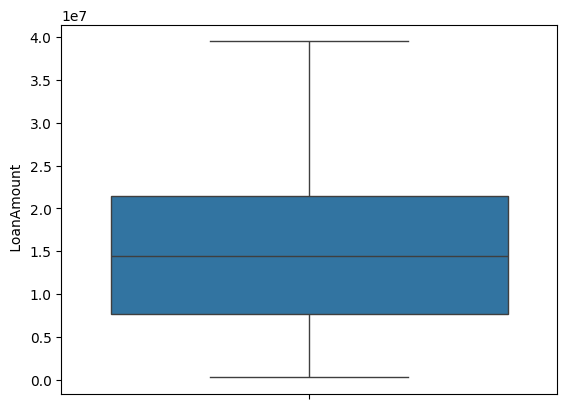

In [15]:
sns.boxplot(loan_data[' LoanAmount'])

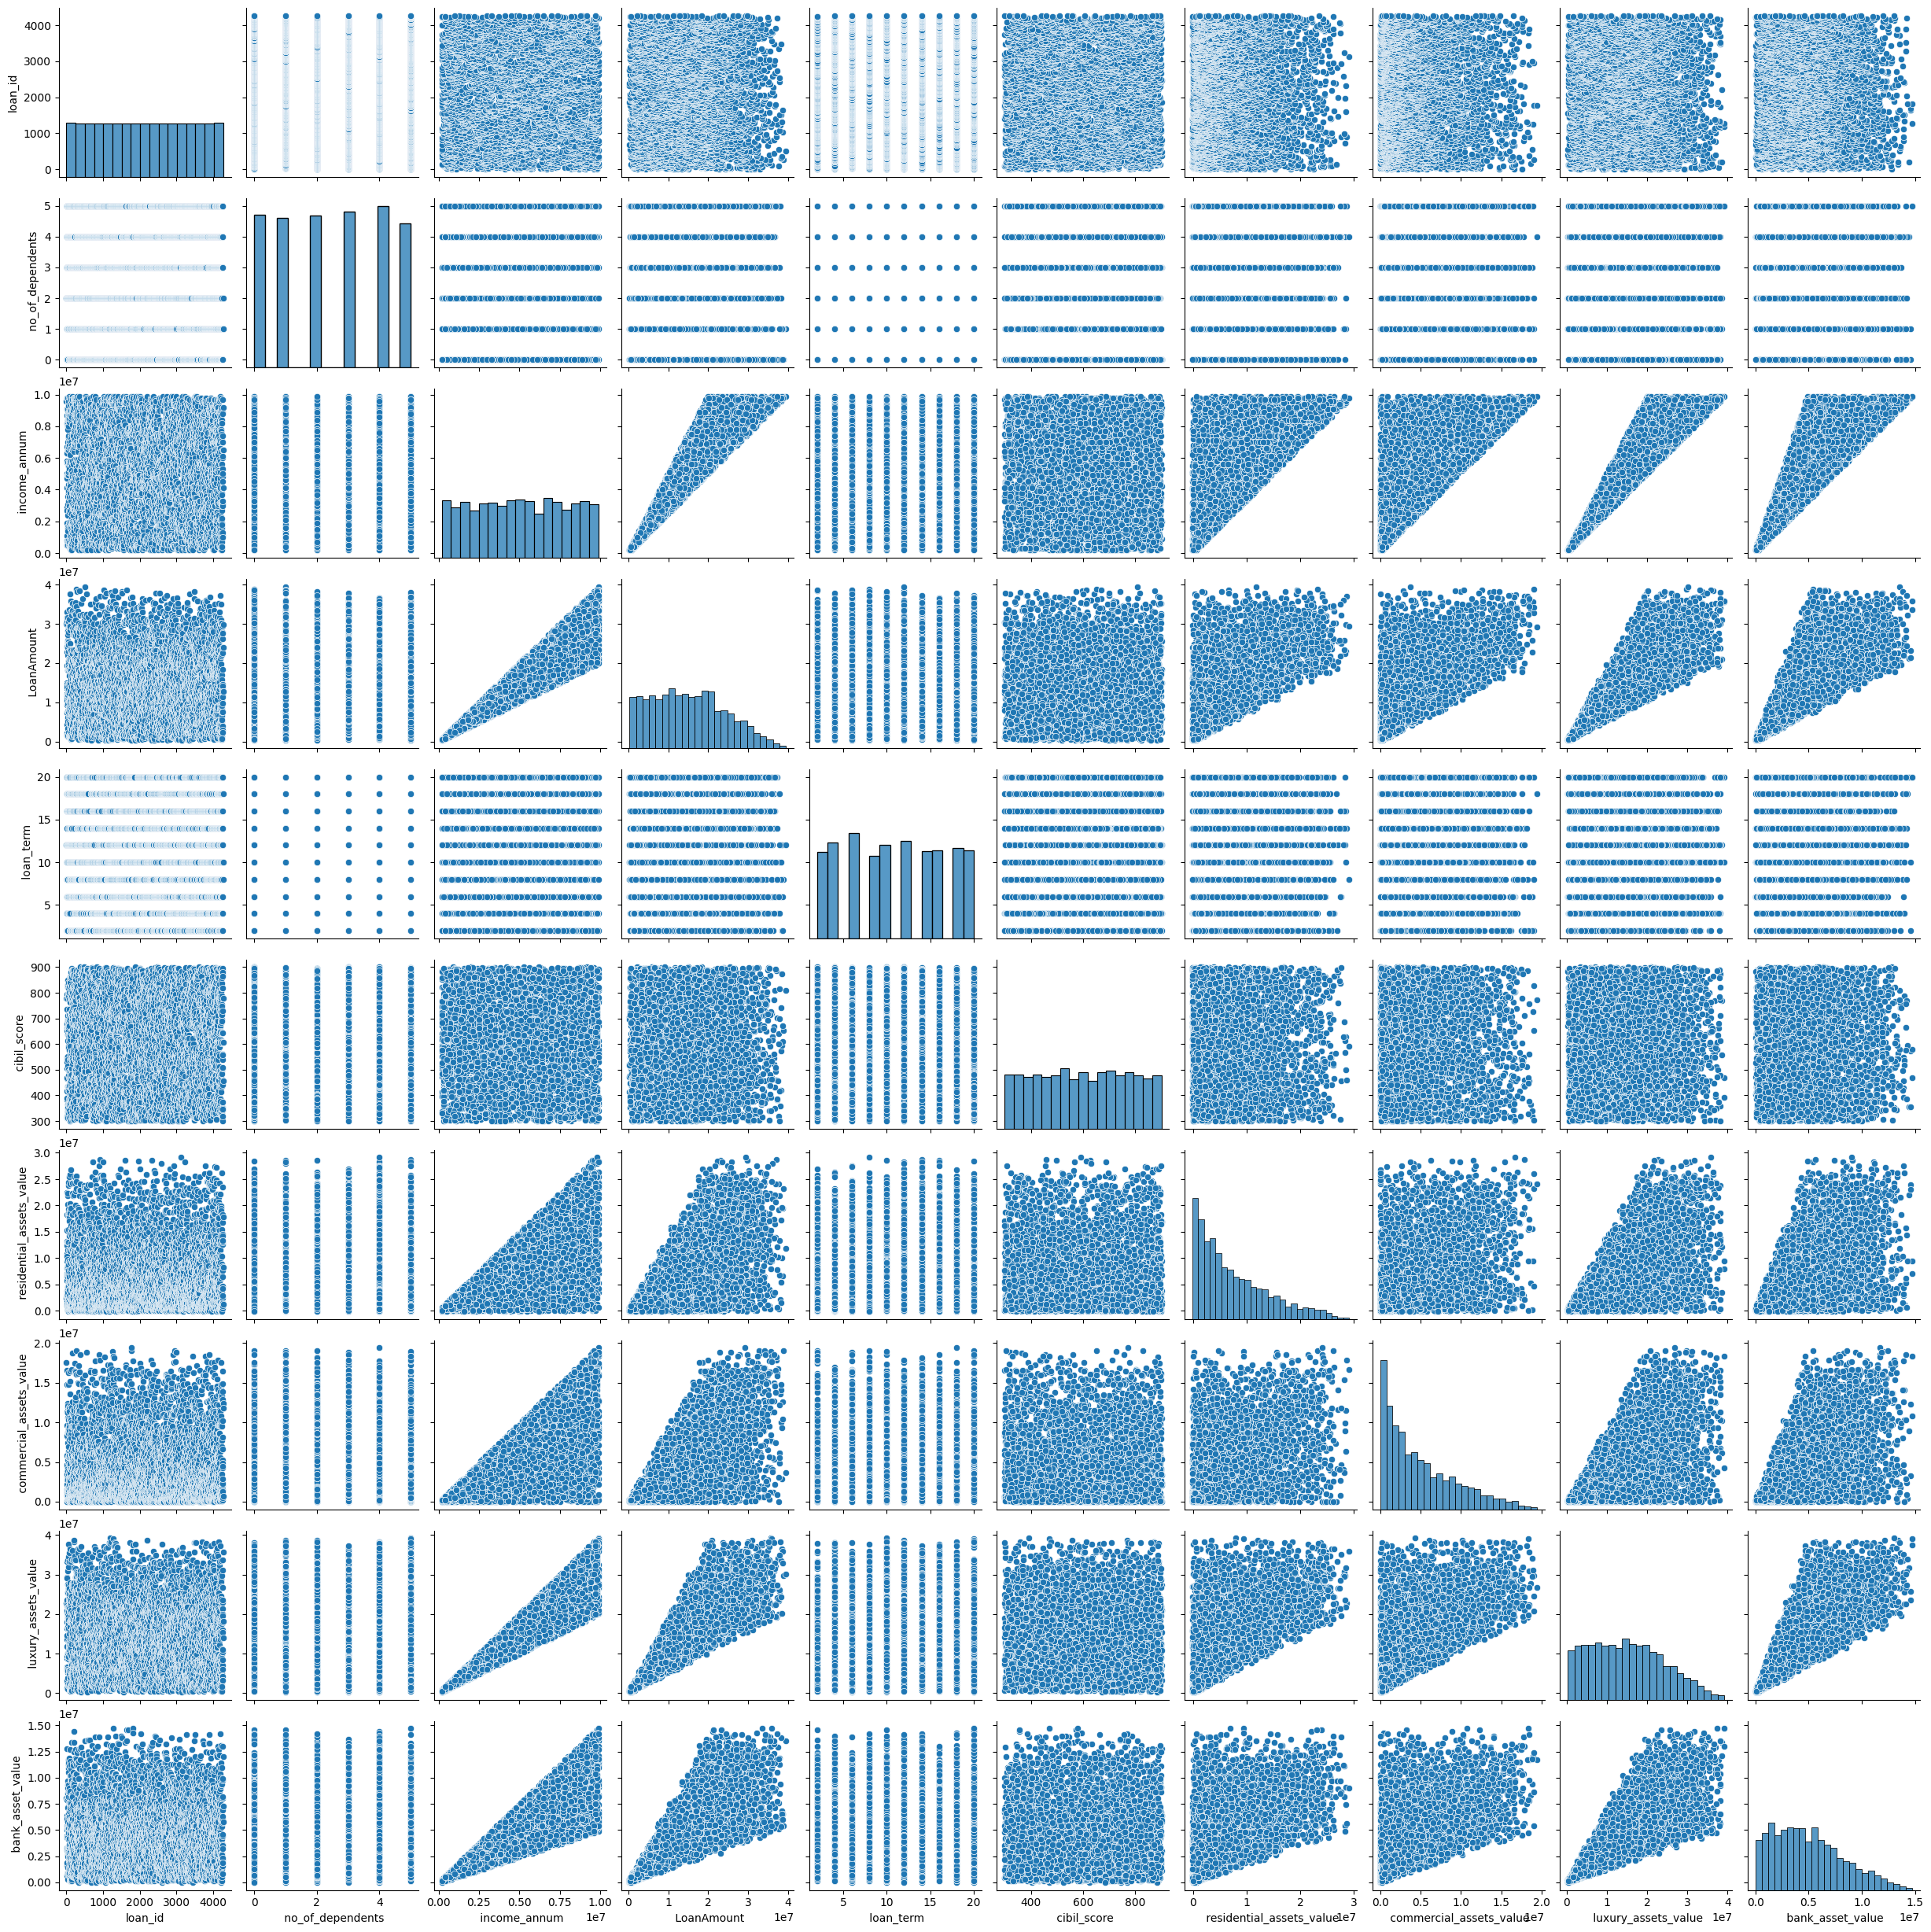

In [16]:
sns.pairplot(loan_data)

Number of people who take loan as group of Dependents:
 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13172\728778844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' no_of_dependents',data=loan_data,palette='Set1')


<Axes: xlabel=' no_of_dependents', ylabel='count'>

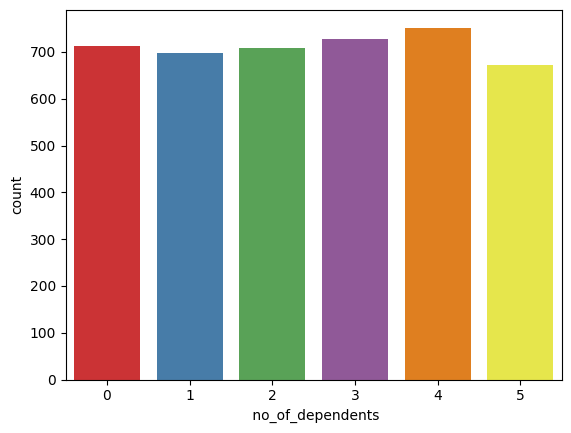

In [17]:
print("Number of people who take loan as group of Dependents:")
print(loan_data[' no_of_dependents'].value_counts())
sns.countplot(x=' no_of_dependents',data=loan_data,palette='Set1')

Number of people who take loan as group of Self_Employed:
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13172\173906965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' self_employed',data=loan_data,palette='Set1')


<Axes: xlabel=' self_employed', ylabel='count'>

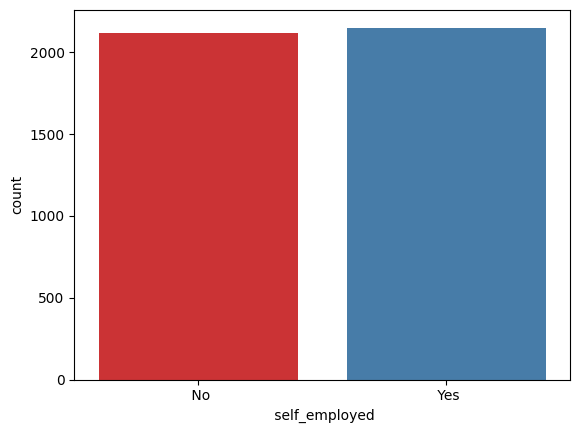

In [18]:
print("Number of people who take loan as group of Self_Employed:")
print(loan_data[' self_employed'].value_counts())
sns.countplot(x=' self_employed',data=loan_data,palette='Set1')

Number of people who take loan as group of LoanAmount:
 LoanAmount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13172\3241626653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' LoanAmount',data=loan_data,palette='Set1')


<Axes: xlabel=' LoanAmount', ylabel='count'>

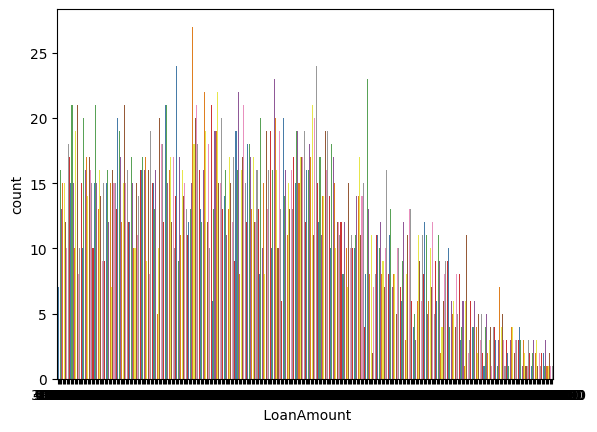

In [19]:
print("Number of people who take loan as group of LoanAmount:")
print(loan_data[' LoanAmount'].value_counts())
sns.countplot(x=' LoanAmount',data=loan_data,palette='Set1')
#plt.hist(loan_data['LoanAmount'])

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [21]:
loan_data[' education']= label_encoder.fit_transform(loan_data[' education']) 
loan_data[' loan_status']= label_encoder.fit_transform(loan_data[' loan_status']) 
loan_data[' self_employed']= label_encoder.fit_transform(loan_data[' self_employed']) 

In [22]:
x = loan_data.drop(['loan_id', ' loan_status'], axis=1)
y = loan_data[' loan_status']

In [23]:
x

no_of_dependents  education  self_employed  income_annum  LoanAmount  \
0                    2          0              0       9600000    29900000   
1                    0          1              1       4100000    12200000   
2                    3          0              0       9100000    29700000   
3                    3          0              0       8200000    30700000   
4                    5          1              1       9800000    24200000   
...                ...        ...            ...           ...         ...   
4264                 5          0              1       1000000     2300000   
4265                 0          1              1       3300000    11300000   
4266                 2          1              0       6500000    23900000   
4267                 1          1              0       4100000    12800000   
4268                 1          0              0       9200000    29700000   

      loan_term  cibil_score  residential_assets_value  \
0            12          778                   2400000   
1             8          417                   2700000   
2            20          506                   7100000   
3             8          467                  18200000   
4            20          382                  12400000   
...         ...          ...                       ...   
4264         12          317                   2800000   
4265         20          559                   4200000   
4266         18          457                   1200000   
4267          8          780                   8200000   
4268         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
0                    17600000             22700000           8000000  
1                     2200000              8800000           3300000  
2                     4500000             33300000          12800000  
3                     3300000             23300000           7900000  
4                     8200000             29400000           5000000  
...                       ...                  ...               ...  
4264                   500000              3300000            800000  
4265                  2900000             11000000           1900000  
4266                 12400000             18100000           7300000  
4267                   700000             14100000           5800000  
4268                 11800000             35700000          12000000  

[4269 rows x 11 columns]

In [24]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_RFC_pred=RFC.predict(x_test)
y_RFC_pred

array([1, 0, 0, ..., 1, 1, 0])

In [30]:
print("accuracy of random forest clf is")
p=metrics.precision_score(y_test, y_RFC_pred)
r=metrics.recall_score(y_test, y_RFC_pred)
a=metrics.accuracy_score(y_test, y_RFC_pred)
f1=metrics.f1_score(y_test, y_RFC_pred)
print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)


accuracy of random forest clf is
precision_score: 0.9702127659574468
recall_score: 0.9175050301810865
accuracy_score: 0.9570647931303669
f1_score: 0.9431230610134437


In [31]:
cm=confusion_matrix(y_test,y_RFC_pred)
cm

array([[770,  14],
       [ 41, 456]], dtype=int64)

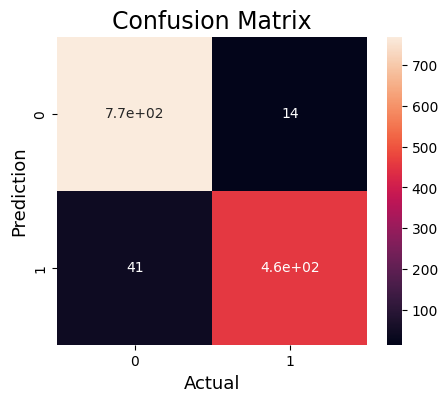

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()